In [8]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#data ingestion
data = pd.read_csv(r'data/gemstone.csv')

### Introduction About the Data :

* The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

* id : unique identifier of each diamond
* carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* cut : Quality of Diamond Cut
* color : Color of Diamond
* clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* table : A diamond's table is the facet which can be seen when the stone is viewed face up.
* x : Diamond X dimension
* y : Diamond Y dimension
* z : Diamond Z dimension

Target variable:

* price: Price of the given Diamond.

### Basic Information

In [11]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


It is clearly seen that the data has 8 numerical features and 3 categorical features

In [16]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values in the data

In [17]:
data.duplicated().sum()

0

There are no duplicates in the data

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [19]:
data.shape

(193573, 11)

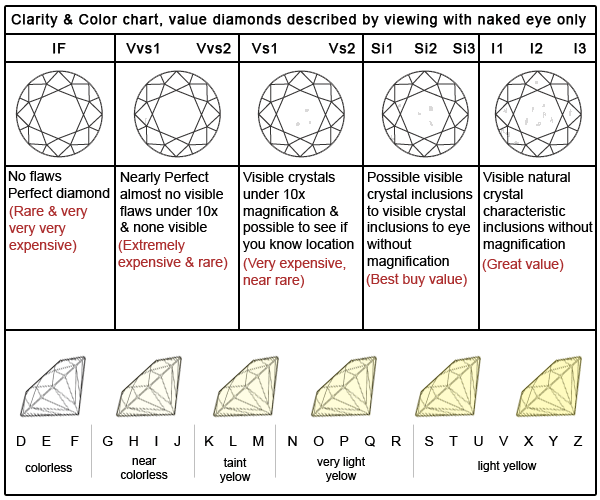

### Features

In [20]:
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

'id' column is dropped as it contributes no value

In [38]:
data = data.drop(['id'],axis=1)

In [39]:
numerical_features = [x for x in data.columns if data.dtypes[x] != 'object']
categorical_features = [x for x in data.columns if data.dtypes[x] == 'object']

In [40]:
print(f'Numerical features : {numerical_features}')
print("*"*30)
print(f'Categorical features : {categorical_features}')

Numerical features : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
******************************
Categorical features : ['cut', 'color', 'clarity']


In [41]:
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [42]:
data[categorical_features]['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [43]:
data[categorical_features]['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [44]:
data[categorical_features]['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

### Visualization

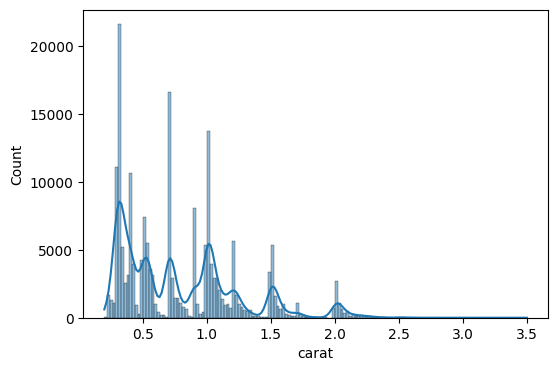

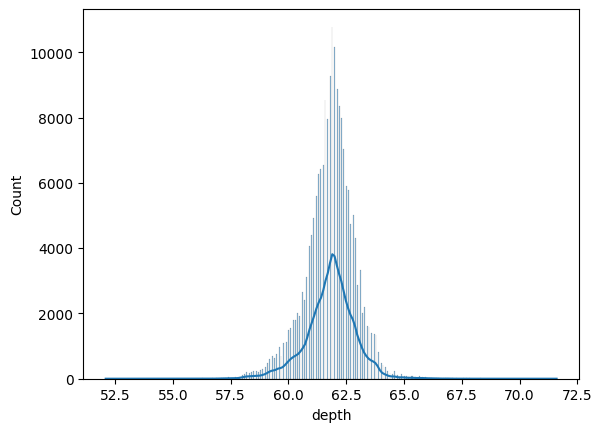

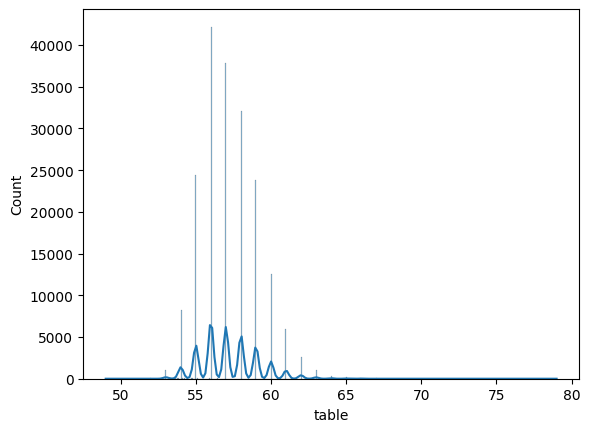

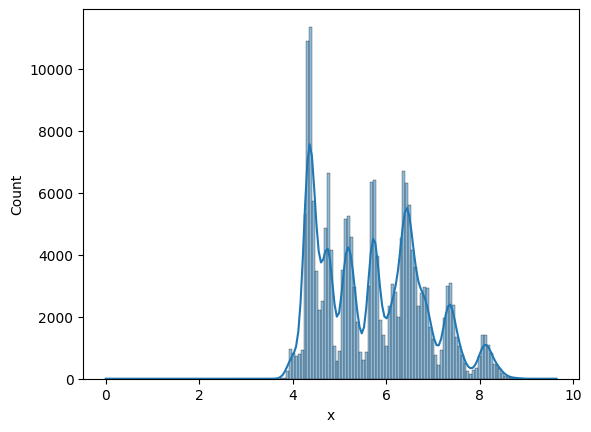

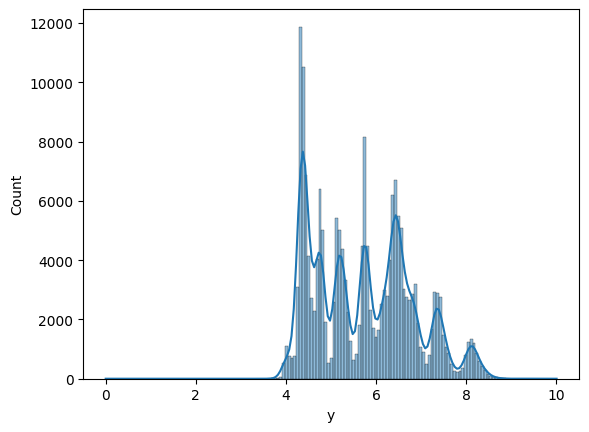

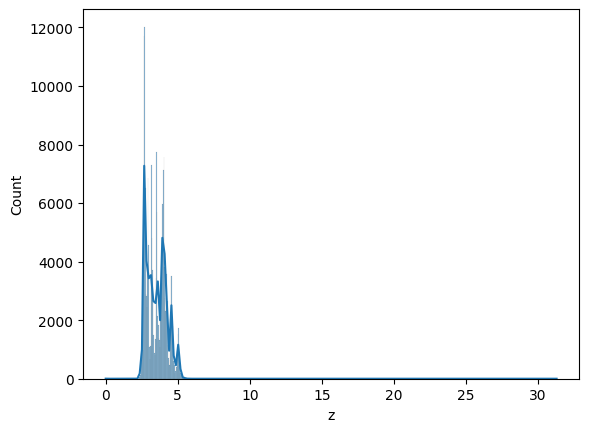

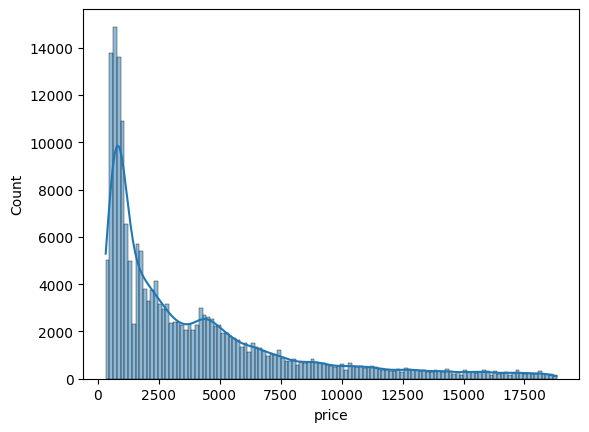

In [45]:
plt.figure(figsize=(6,4))

for columns in numerical_features:
    sns.histplot(data=data,x=columns,kde=True)
    print('\n')
    plt.show()

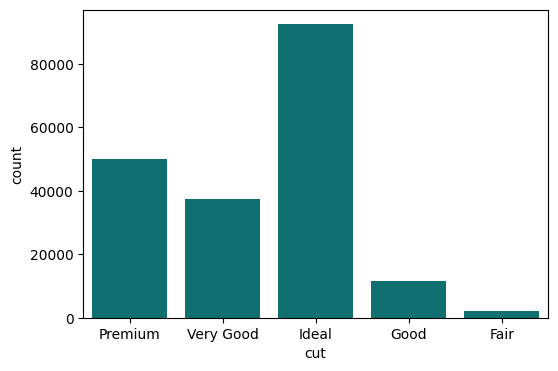

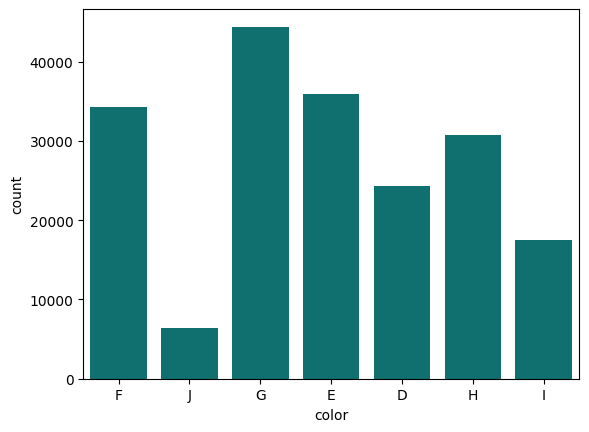

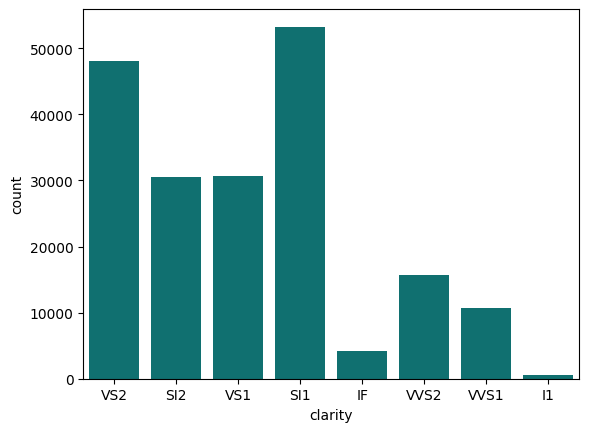

In [52]:
plt.figure(figsize=(6,4))

for columns in categorical_features:
    sns.countplot(data=data,x=columns,color='teal')
    print('\n')
    plt.show()
    

### Correlation

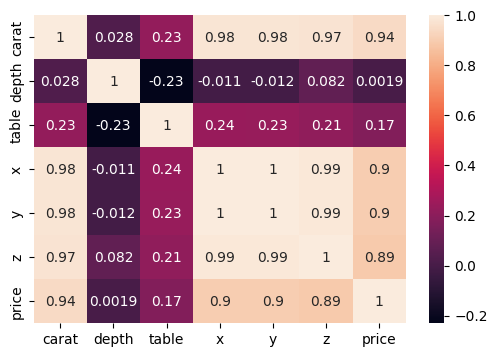

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(data=data[numerical_features].corr(),annot=True)
plt.show()

* X and Y are highly positively correlated
* carat is highly correlated with X and Y
* depth and table are negatively correlated

### Encoding

In [60]:
categorical_features

['cut', 'color', 'clarity']

In [61]:
data[categorical_features]['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [154]:
data[categorical_features]['color'].sort_values().unique()

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [64]:
data[categorical_features]['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

Based on the understanding from the data, it is assumed that all the categorical values should ordinally encoded as all the features possesses a distinct order or ranking among its categories.

In [65]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [152]:
data.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
115787,0.30,Ideal,G,VVS2,62.3,56.0,4.27,4.31,2.67,684
26668,0.90,Fair,G,SI2,65.4,58.0,6.00,6.06,3.92,2396
32704,0.90,Ideal,E,SI2,61.8,54.0,6.18,6.25,3.84,3280
131656,0.50,Good,E,SI1,63.3,57.0,5.10,5.04,3.20,1235
134760,0.36,Ideal,D,VS2,62.0,55.0,4.56,4.61,2.85,863


In [156]:
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color_map = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
clarity_map = {'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1}


In [157]:
data['cut'] = data['cut'].map(cut_map)
data['color'] = data['color'].map(color_map)
data['clarity'] = data['clarity'].map(clarity_map)

In [158]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
